##### PROBLEM STATEMENT

The rise in obesity has become a major public health concern worldwide. This project aims to address this issue by developing a predictive model that can classify individuals into obesity categories (such as normal weight, overweight, or obese) based on a set of measurable features like:

->Age, Height, Weight

->Physical activity level

->Frequency of consuming high-calorie food

->Water intake

->Smoking, alcohol use

->Use of technology (sedentary behavior)

->Transportation methods, and more

The dataset includes both real and synthetically generated records, and the target variable NObeyesdad contains 7 classes representing different obesity levels.

##### DATA COLLECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
obse_df= pd.read_csv("Dataset.csv")

In [3]:
obse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
obse_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##### DESCRIPTIVE STATISTICS

In [5]:
obse_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


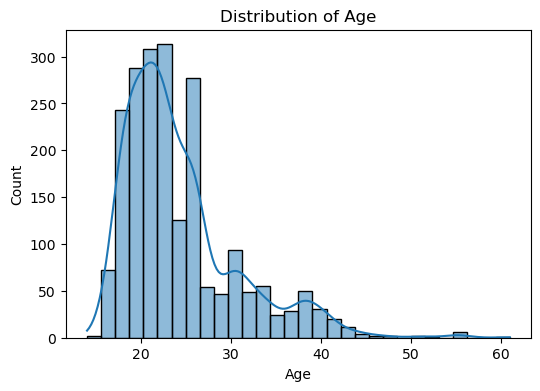

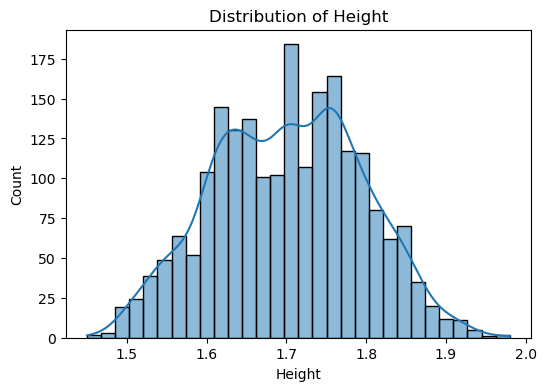

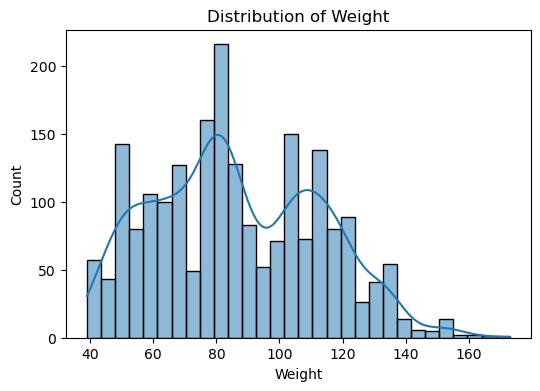

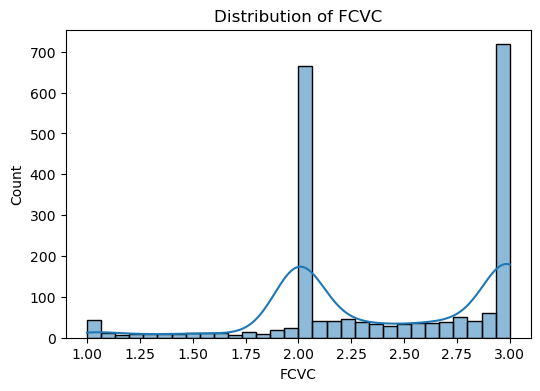

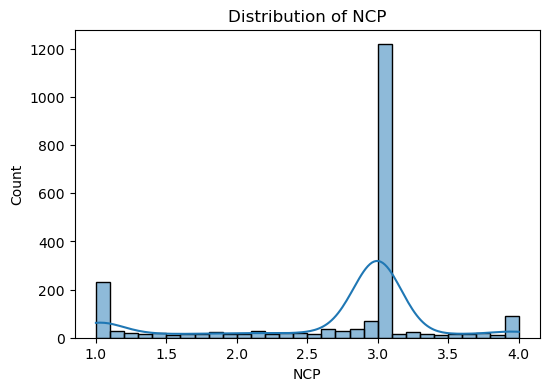

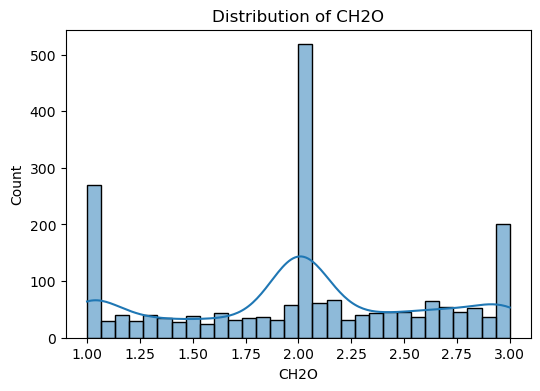

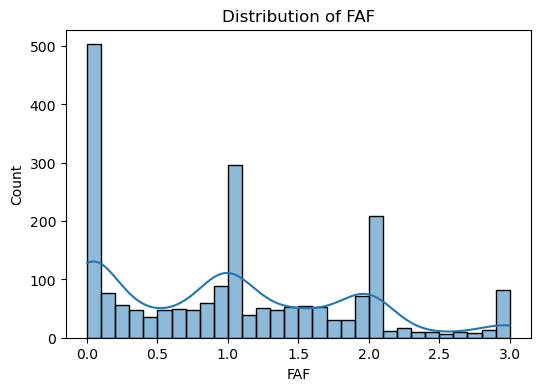

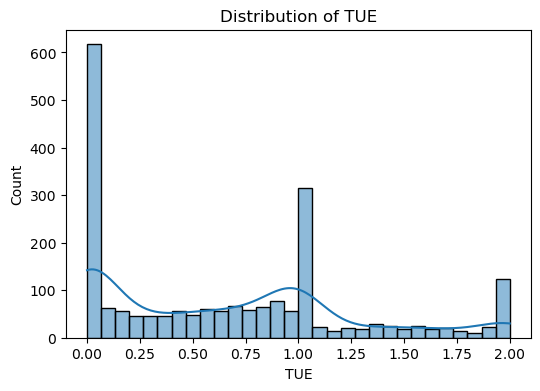

In [6]:
#Histrogram for all numeric columns
for col in obse_df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(obse_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


Age:
Likely right-skewed (more younger individuals).
Majority clustered in the 20–30 age range.

Height:
Approximates a normal distribution.
Most individuals fall within an average height range.

Weight:
Right-skewed distribution.
More individuals have lower weights; a smaller group with very high weights indicates possible obesity cases.

NCP (Number of meals):
Peaks at 3 meals/day, tapering off on both sides.
Reflects standard meal habits.

CH2O (Water Intake):
Slightly left-skewed.
Most people drink 2–3 liters/day.

FAF (Physical Activity Frequency):
Varies widely.
Many with low physical activity; some with higher activity.

TUE (Tech Usage):
Right-skewed.
High number of individuals with low usage, but a noticeable group spends more hours on tech devices.

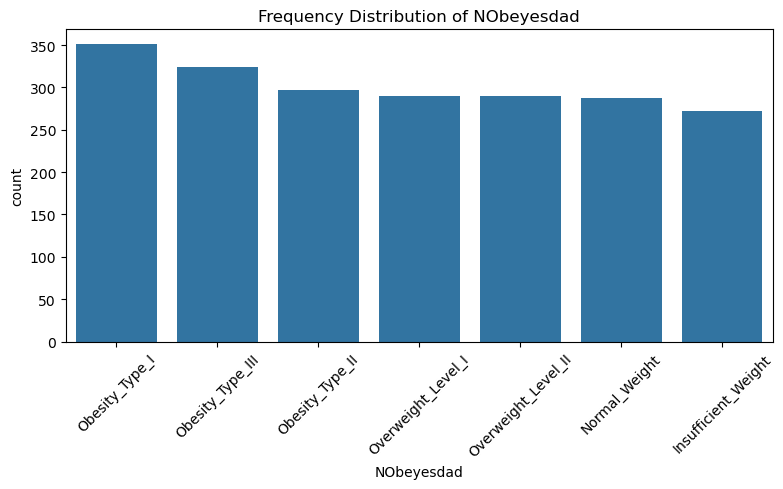

In [7]:
# count plot for the frequency distribution of the target
plt.figure(figsize=(8, 5))
sns.countplot(data=obse_df, x='NObeyesdad', order=obse_df['NObeyesdad'].value_counts().index)
plt.title('Frequency Distribution of NObeyesdad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NObeyesdad (Obesity Level – Target Variable):
All classes are reasonably distributed.
Obesity Type I has the highest count, followed by Types III, II, and Overweight Levels I & II.


In [8]:
#to find the most common value in each categorical column
cat_cols = obse_df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"{col} → Mode: {obse_df[col].mode()[0]}")
    print(obse_df[col].value_counts(normalize=True)[:5])  
    print("-" * 40)


Gender → Mode: Male
Gender
Male      0.505921
Female    0.494079
Name: proportion, dtype: float64
----------------------------------------
family_history_with_overweight → Mode: yes
family_history_with_overweight
yes    0.817622
no     0.182378
Name: proportion, dtype: float64
----------------------------------------
FAVC → Mode: yes
FAVC
yes    0.883941
no     0.116059
Name: proportion, dtype: float64
----------------------------------------
CAEC → Mode: Sometimes
CAEC
Sometimes     0.836097
Frequently    0.114638
Always        0.025107
no            0.024159
Name: proportion, dtype: float64
----------------------------------------
SMOKE → Mode: no
SMOKE
no     0.979157
yes    0.020843
Name: proportion, dtype: float64
----------------------------------------
SCC → Mode: no
SCC
no     0.954524
yes    0.045476
Name: proportion, dtype: float64
----------------------------------------
CALC → Mode: Sometimes
CALC
Sometimes     0.663667
no            0.302700
Frequently    0.033160
Always  

Gender: Nearly balanced — Male (50.6%) slightly more than Female (49.4%).

family_history_with_overweight: Skewed — Yes in 81.8% of cases.

SMOKE: Vast majority are Non-smokers (97.9%).

SCC (Calories monitoring): Most people do not monitor calories (95.5%).

CALC (Alcohol): Sometimes is the most common (66.4%), followed by No (30.3%).

NObeyesdad (Target – Obesity Level): Most common is Obesity Type I (16.6%), followed closely by Types III and II, and both Overweight Levels.


Most individuals have unhealthy habits: frequent high-calorie food, snacking, not tracking calories.
Smoking is rare.
Obesity-related classes are well-distributed, but Obesity Type I is the most prevalent.

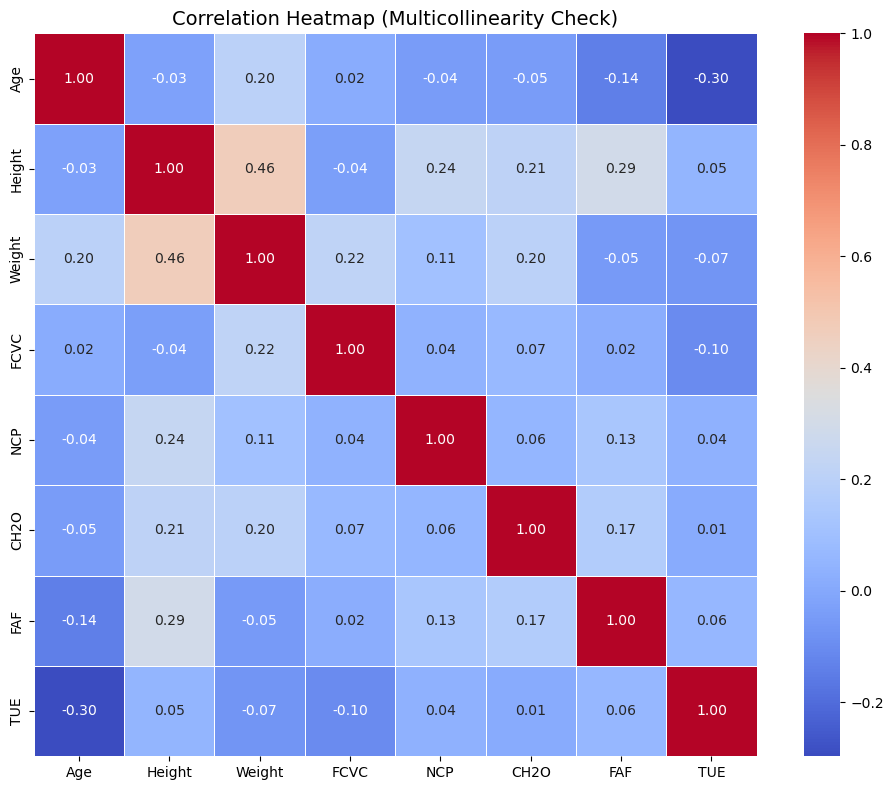

In [9]:
numeric_data = obse_df.select_dtypes(include=['int64', 'float64'])

#Compute correlation matrix
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Multicollinearity Check)", fontsize=14)
plt.tight_layout()
plt.show()

No strong correlations (|r| ≥ 0.8), so multicollinearity is not an issue in your numeric features.

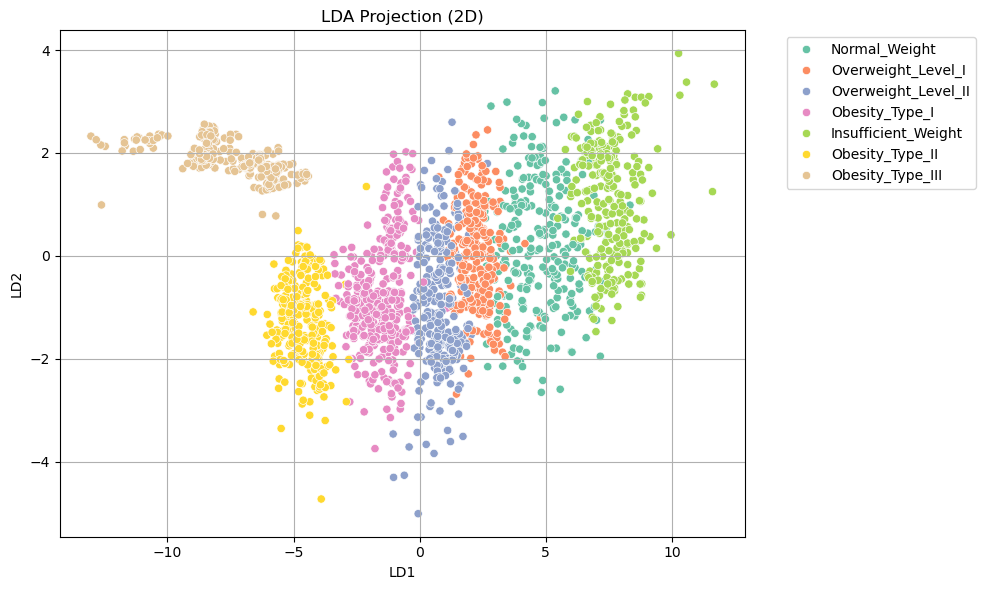

In [10]:
# used LDA for dimensionality reduction to visualize separation of classes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = obse_df.drop(columns='NObeyesdad')
y = obse_df['NObeyesdad']


num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

X_processed = preprocessor.fit_transform(X)

# Applying LDA (max components = number of classes - 1)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed, y)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette='Set2')
plt.title("LDA Projection (2D)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


1.Classes like Normal_Weight, Obesity_Type_III, and Insufficient_Weight are clearly separable — ideal for classification models.

2.Middle classes like Overweight_Level_I, Overweight_Level_II, and Obesity_Type_I overlap somewhat, indicating:

 ->Feature similarity (e.g., moderate BMI, similar lifestyle features)

 ->Potential difficulty in separating these cases perfectly using linear boundaries.

3. LD1 appears to separate classes along the weight severity scale (from Insufficient to Obesity_Type_III).
LD2 adds vertical separation, especially helping with Obesity_Type_III.


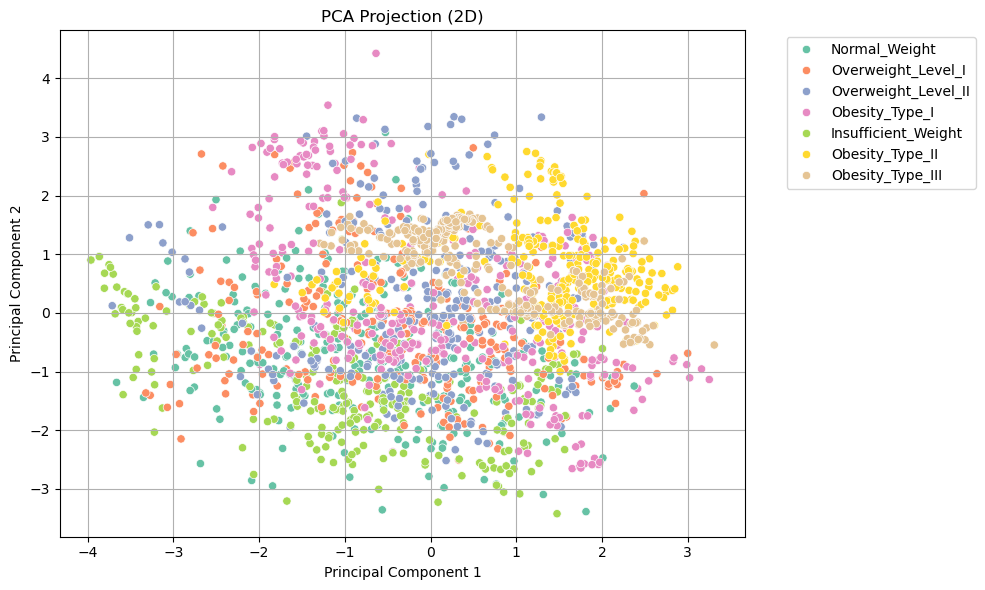

In [12]:
# using PCA for visualisation
from sklearn.decomposition import PCA

X_processed = preprocessor.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2')
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

Most classes (colors) overlap, indicating that PCA did not find strong separation between NObeyesdad classes.

Obesity_Type_III & II form loose clusters.These classes show moderate grouping, but still with overlap.

Normal and Insufficient Weight overlap.These two are not well-separated, suggesting similar feature patterns in the PCA space.

PCA focused on variance, not class separation

##### DATA CLEANING

In [13]:
# checking for null values
obse_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [14]:
obse_df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
missing_counts = obse_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

print("Columns with missing values:\n", missing_counts)

Columns with missing values:
 Series([], dtype: int64)


This shows that there are no missing values.

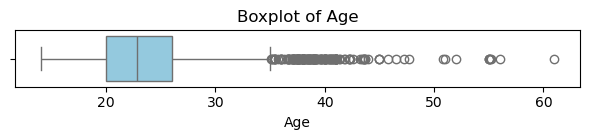

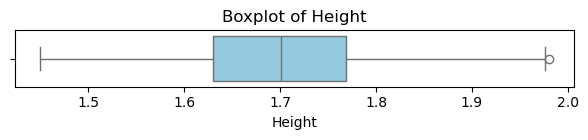

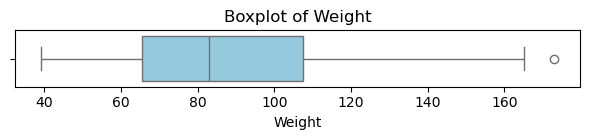

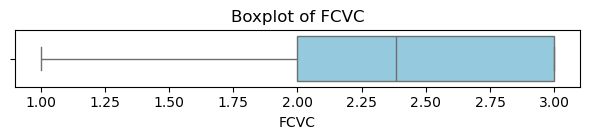

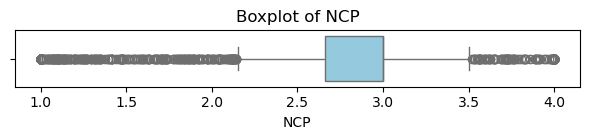

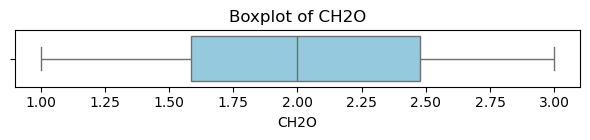

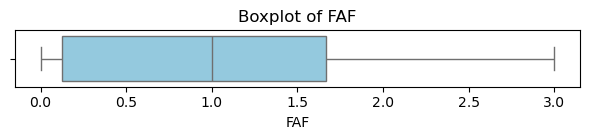

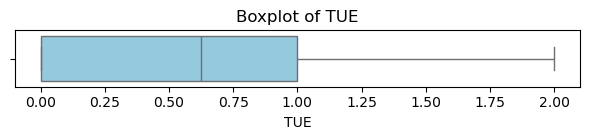

In [17]:
# box plot to check for outliers
for col in obse_df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=obse_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [18]:
#checking for outliers using Z-Score
from scipy.stats import zscore

df_numeric = obse_df.select_dtypes(include=['int64', 'float64'])

# Calculates Z-scores
z_scores = df_numeric.apply(zscore)

# Identify outliers: Z > 3 or Z < -3
outliers_mask = (z_scores.abs() > 3)

outlier_data = df_numeric[outliers_mask]
total_outliers = outliers_mask.sum().sum()

# Count unique rows that contain at least one outlier
rows_with_outliers = outliers_mask.any(axis=1).sum()

print(f"Total outlier values: {total_outliers}")
print(f"Rows with at least one outlier: {rows_with_outliers}")
print(f"% of rows with outliers: {(rows_with_outliers / len(df_numeric)) * 100:.2f}%")


Total outlier values: 25
Rows with at least one outlier: 25
% of rows with outliers: 1.18%


In [19]:
#checking for outliers using IQR 
outlier_mask = pd.DataFrame(False, index=df_numeric.index, columns=df_numeric.columns)

for col in df_numeric.columns:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask[col] = (df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)

# total number of outlier values
total_outliers = outlier_mask.sum().sum()

# number of rows that contain at least one outlier
rows_with_outliers = outlier_mask.any(axis=1).sum()

print(f"Total outlier values: {total_outliers}")
print(f"Rows with at least one outlier: {rows_with_outliers}")
print(f"% of rows with outliers: {(rows_with_outliers / len(df_numeric)) * 100:.2f}%")

Total outlier values: 749
Rows with at least one outlier: 702
% of rows with outliers: 33.25%


In [20]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Applying Isolation Forest
iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
outlier_preds = iso.fit_predict(scaled_data) 

outlier_count = (outlier_preds == -1).sum()
total = len(outlier_preds)

print(f" Outliers detected by Isolation Forest: {outlier_count}")
print(f" Percentage of outliers: {outlier_count / total * 100:.2f}%")

 Outliers detected by Isolation Forest: 106
 Percentage of outliers: 5.02%


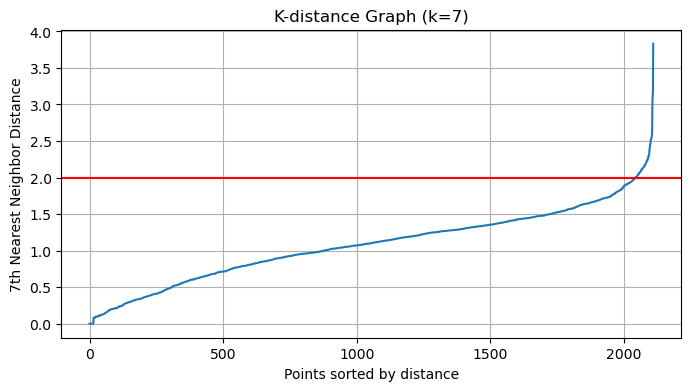

In [21]:
# checking for outliers using DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
k=7
nn = NearestNeighbors(n_neighbors = k).fit(scaled_data)

dist, ind = nn.kneighbors(scaled_data)

dist = np.sort(dist[:, k - 1])  # Get k-th nearest distance

# Plot to find elbow
plt.figure(figsize=(8, 4))
plt.plot(dist)
plt.axhline(y=2.00, color='r', linestyle='-')
plt.title(f'K-distance Graph (k={k})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

From the plot we can observe that the elbow takes a sharp bend around 2.00 so the optimal eps value is 2.00

In [22]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.00, min_samples= 2).fit(scaled_data)

clusters = dbscan.labels_
display(pd.DataFrame(clusters).value_counts(normalize=True)*100)

0 
 0    99.668404
-1     0.331596
Name: proportion, dtype: float64

In [23]:
outlier_count = (clusters == -1).sum()
print(f"Number of outliers: {outlier_count}")

Number of outliers: 7


##### OUTLIERS CLEANING

In [24]:
obse_df_cleaned = obse_df.copy()
obse_df_cleaned['DBSCAN_Label'] = clusters

obse_df_no_outliers = obse_df_cleaned[obse_df_cleaned['DBSCAN_Label'] != -1].drop(columns=['DBSCAN_Label'])

print(f"Original dataset: {obse_df.shape}")
print(f"Cleaned dataset: {obse_df_no_outliers.shape}")

Original dataset: (2111, 17)
Cleaned dataset: (2104, 17)


##### PAIRPLOT

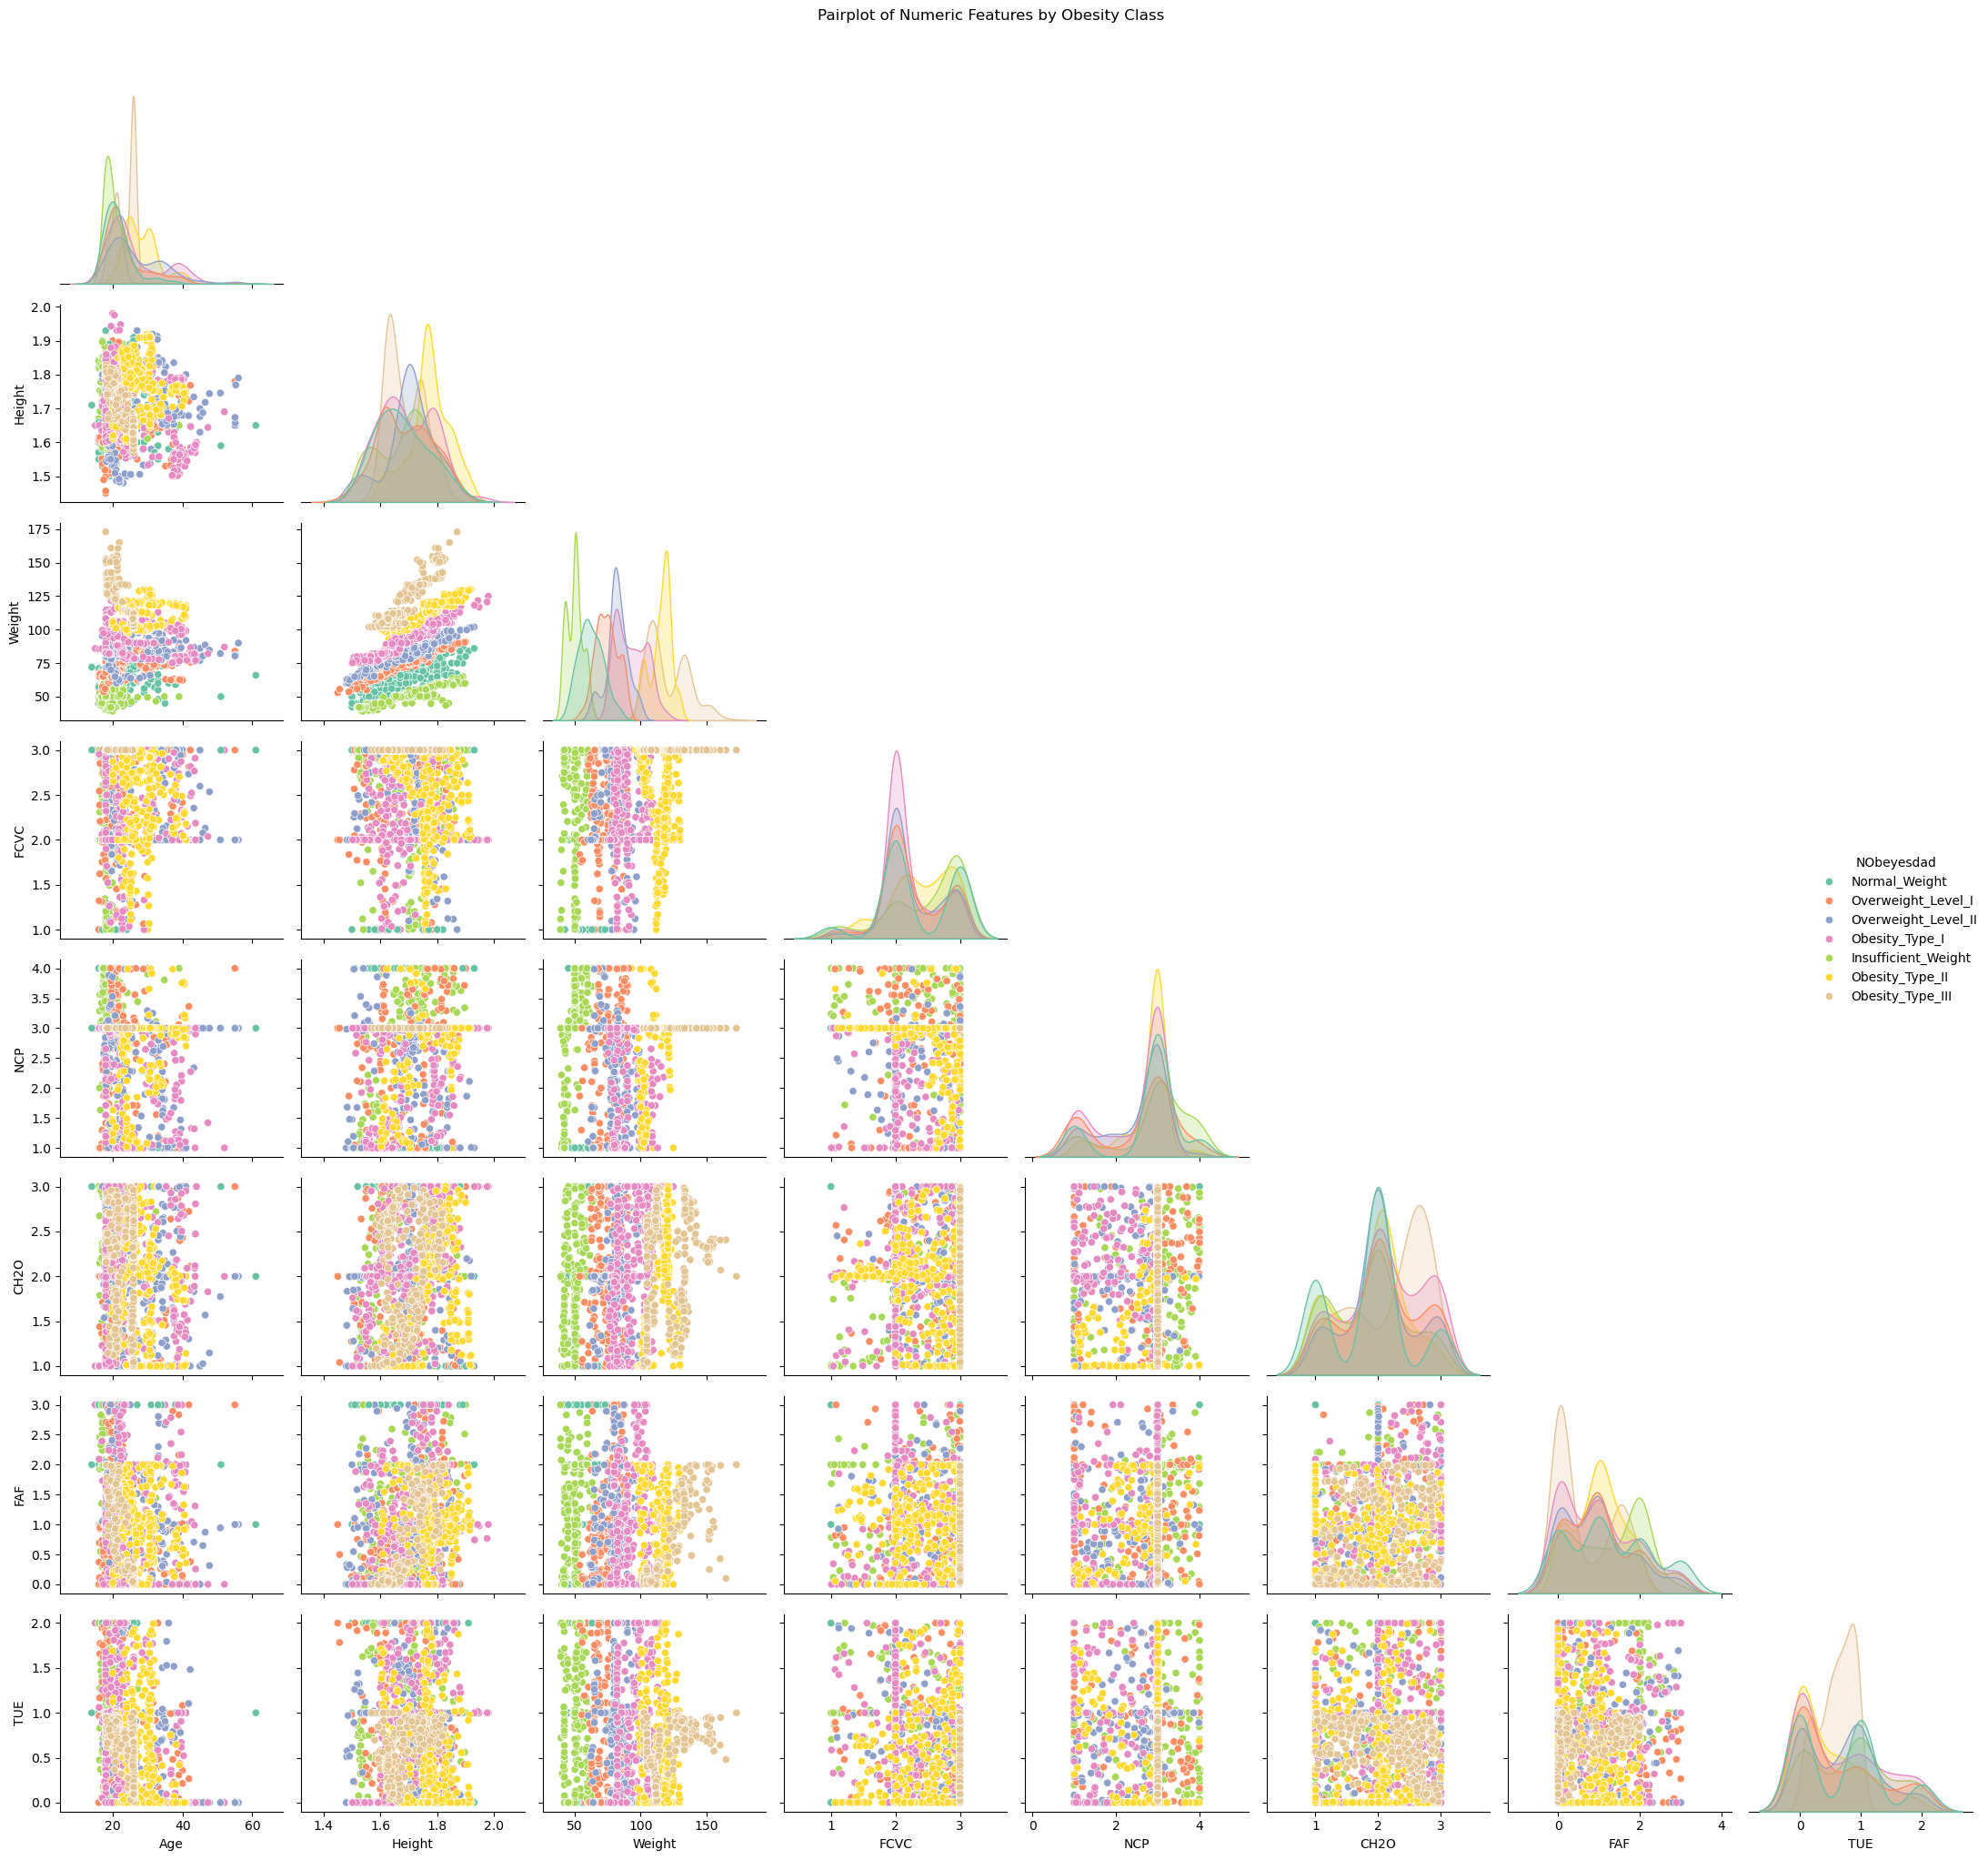

In [25]:
numeric_cols = obse_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plot_df = obse_df[numeric_cols + ['NObeyesdad']]

sns.pairplot(plot_df, hue='NObeyesdad', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features by Obesity Class", y=1.02)
plt.tight_layout()
plt.show()


Weight shows strong separation across obesity classes — key predictor.

Height correlates with weight, but less informative alone.

FAF, CH2O, TUE show some class-wise patterns — low activity/water often align with obesity.

Other features (like age) have overlapping distributions.

Obesity_Type_II & III cluster in high-weight, low-activity zones.

##### DATA SPLITING AND TRAINING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 1. Separate features and target
X = obse_df.drop(columns='NObeyesdad')
y = obse_df['NObeyesdad']

# 2. Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include='object').columns

# 3. Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# 5. Models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier( eval_metric='mlogloss')
}

# 6. Train and evaluate
results = []

for name, model in models.items():
    # Createing a pipeline with preprocessing + model
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    # Train and predict
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

# 7. comparison table
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print("\nModel Performance Comparison:")
display(results_df.round(2))


Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
7,XGBoost,0.95,0.95,0.95,0.95
5,Gradient Boosting,0.95,0.95,0.95,0.95
4,Random Forest,0.95,0.95,0.95,0.95
3,Decision Tree,0.95,0.95,0.95,0.95
2,SVM,0.93,0.93,0.93,0.93
0,Logistic Regression,0.87,0.88,0.87,0.87
1,KNN,0.82,0.81,0.82,0.80
6,Naive Bayes,0.52,0.53,0.52,0.46


Ensemble-based models (XGBoost, Gradient Boosting, Random Forest) and decision trees show superior performance out-of-the-box, making them ideal initial choices for this classification task. 

Naive Bayes is not suitable due to its simplistic assumptions.

Logistic Regression and SVM are decent but slightly less accurate than other models.

##### BAR CHART FOR COMPARISION OF MODEL

In [35]:
print(results_df.columns)

Index(['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'], dtype='object')


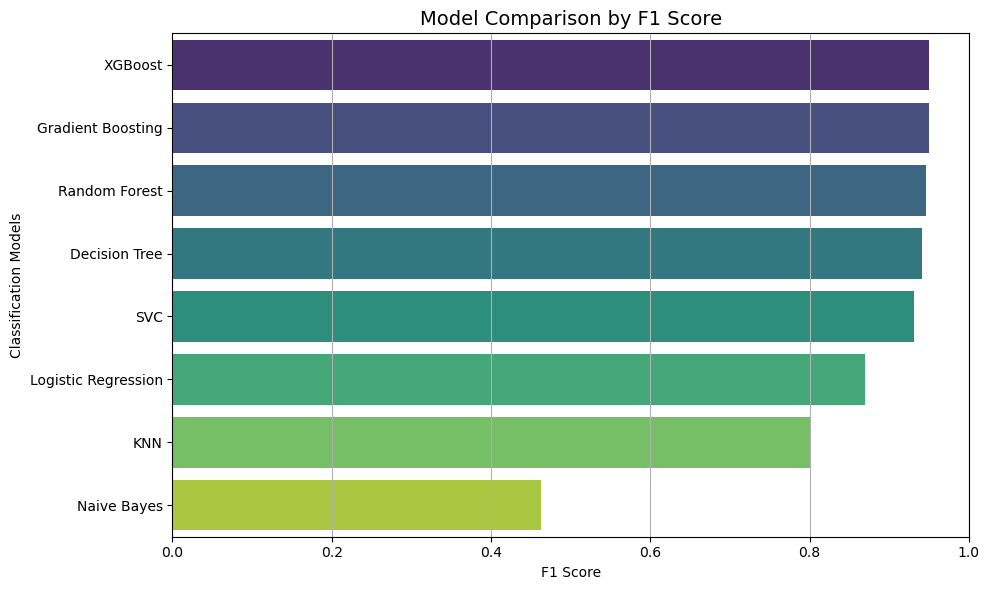

In [36]:
# Sort results by F1 Score
results_df_sorted = results_df.sort_values(by='F1-Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_sorted, x='F1-Score', y='Model', hue='Model', palette='viridis', legend=False)

plt.title("Model Comparison by F1 Score", fontsize=14)
plt.xlabel("F1 Score")
plt.ylabel("Classification Models")
plt.xlim(0, 1.0)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

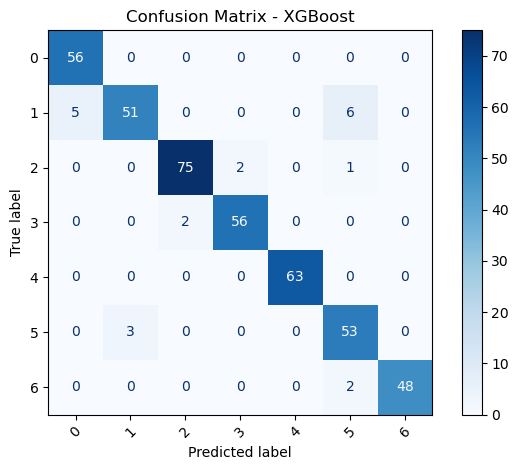

<Figure size 800x600 with 0 Axes>

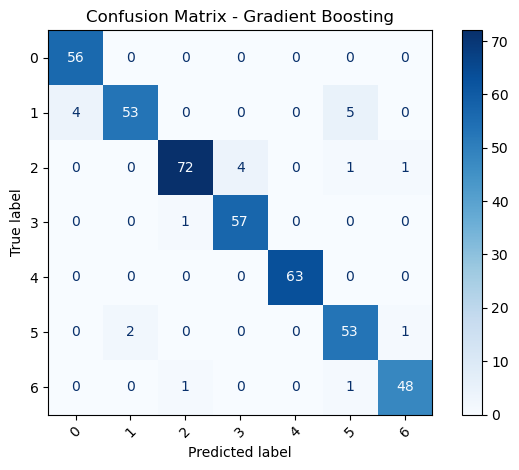

In [29]:
#confusion matrix for best two models 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

top_models = {
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in top_models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)

    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()


##### The diagonal cells represent correct predictions or true positives for each class.

##### Off-Diagonal Values (missclassifications) indicate where the model is making errors — confusing one class for another.

##### Both models show high accuracy, with most predictions on the diagonal (correct classifications).

##### XGBoost slightly outperforms Gradient Boosting, especially on more ambiguous classes.

In [32]:
#comparision of models before and after LDA
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

#  Manual preprocessing for LDA
X_processed = preprocessor.fit_transform(X)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_processed, y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_p.toarray() if hasattr(X_train_p, "toarray") else X_train_p, y_train_p)
X_test_lda = lda.transform(X_test_p.toarray() if hasattr(X_test_p, "toarray") else X_test_p)

#  Metric collector
def get_all_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    }

# Evaluate all models before & after LDA
results = []
LDA_results=[]
for name, model in models.items():
    # Before LDA features
    pipeline_full = Pipeline([("preprocess", preprocessor), ("model", model)])
    pipeline_full.fit(X_train, y_train)
    y_pred_full = pipeline_full.predict(X_test)
    full_metrics = get_all_metrics(y_test, y_pred_full)

    # LDA-reduced features 
    model.fit(X_train_lda, label_encoder.transform(y_train_p))
    y_pred_lda = model.predict(X_test_lda)
    y_pred_lda_labels = label_encoder.inverse_transform(y_pred_lda)

    lda_metrics = get_all_metrics(y_test_p, y_pred_lda_labels)

    results.append({
        "Model": name,
        "Accuracy": full_metrics["Accuracy"],
        "Precision": full_metrics["Precision"],
        "Recall": full_metrics["Recall"],
        "F1-Score": full_metrics["F1-Score"],
    })
    LDA_results.append({
         "Model": name,
         "Accuracy (LDA)": lda_metrics["Accuracy"],
        "Precision (LDA)": lda_metrics["Precision"],
        "Recall (LDA)": lda_metrics["Recall"],
        "F1-Score (LDA)": lda_metrics["F1-Score"]
    })
#  Display results
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
LDA_results_df=pd.DataFrame(LDA_results).sort_values(by="F1-Score (LDA)", ascending=False)
print("Model Performance Comparison (Full vs LDA-reduced):\n")
display(results_df.round(2))
print("\n")
display(LDA_results_df.round(2))

Model Performance Comparison (Full vs LDA-reduced):



,Model,Accuracy,Precision,Recall,F1-Score
7,XGBoost,0.95,0.95,0.95,0.95
4,Gradient Boosting,0.95,0.95,0.95,0.95
3,Random Forest,0.95,0.95,0.95,0.95
2,Decision Tree,0.94,0.94,0.94,0.94
1,SVC,0.93,0.93,0.93,0.93
0,Logistic Regression,0.87,0.88,0.87,0.87
6,KNN,0.82,0.81,0.82,0.80
5,Naive Bayes,0.52,0.53,0.52,0.46


,Model,Accuracy (LDA),Precision (LDA),Recall (LDA),F1-Score (LDA)
7,XGBoost,0.95,0.95,0.95,0.95
3,Random Forest,0.94,0.94,0.94,0.94
1,SVC,0.93,0.93,0.93,0.93
4,Gradient Boosting,0.93,0.93,0.93,0.93
5,Naive Bayes,0.93,0.93,0.93,0.93
0,Logistic Regression,0.92,0.92,0.92,0.92
2,Decision Tree,0.92,0.92,0.92,0.92
6,KNN,0.91,0.91,0.91,0.91


LDA effectively preserves class-separability while reducing feature dimensions, improving the performance of simpler models and maintaining performance of advanced ones.

Ensemble methods (XGBoost, Random Forest, Gradient Boosting) are robust both with and without LDA, making them top choices overall.

Naive Bayes benefits the most from LDA, indicating that dimensionality reduction can be crucial for certain algorithms.

##### HYPERPARAMETER TUNING 


Tuning: Logistic Regression
 Best Params: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}

Tuning: KNN
 Best Params: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}

Tuning: SVC
 Best Params: {'classifier__C': 10, 'classifier__kernel': 'linear'}

Tuning: Decision Tree
 Best Params: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5}

Tuning: Random Forest
 Best Params: {'classifier__max_depth': 20, 'classifier__n_estimators': 150}

Tuning: Gradient Boosting
 Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}

Tuning: XGBoost
 Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 150}


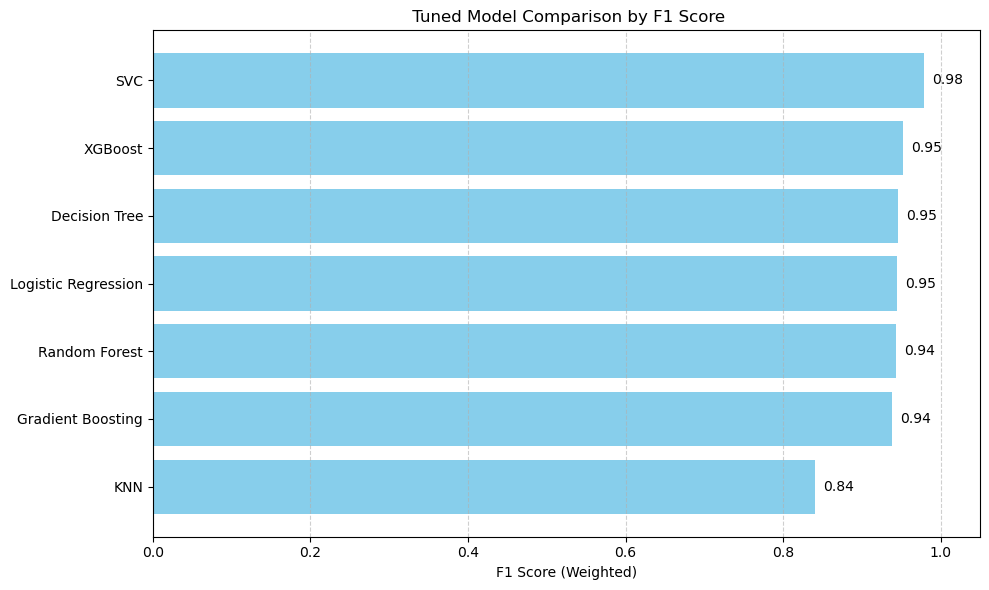

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

models_and_params = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['lbfgs']
        }
    ),
    "KNN": (
        KNeighborsClassifier(),
        {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ),
    "SVC": (
        SVC(probability=True),
        {
            'classifier__C': [1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    ),
    "Decision Tree": (
        DecisionTreeClassifier(),
        {
            'classifier__max_depth': [5, 10, 20],
            'classifier__min_samples_split': [2, 5]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            'classifier__n_estimators': [100, 150],
            'classifier__max_depth': [10, 20]
        }
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {
            'classifier__n_estimators': [100, 150],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__max_depth': [3, 5]
        }
    ),
    "XGBoost": (
        XGBClassifier(eval_metric='mlogloss'),
        {
            'classifier__n_estimators': [100, 150],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.05, 0.1]
        }
    )
}
model_scores = []

for name, (model, param_grid) in models_and_params.items():
    print(f"\nTuning: {name}")
    
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print(" Best Params:", grid.best_params_)
    
    y_pred = grid.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    f1_score_weighted = report['weighted avg']['f1-score']
    model_scores.append((name, f1_score_weighted))
    
# --- Plotting the F1-score comparison ---
model_scores.sort(key=lambda x: x[1], reverse=True)  # Sort by score
models, f1_scores = zip(*model_scores)

plt.figure(figsize=(10, 6))
bars = plt.barh(models, f1_scores, color='skyblue')
plt.xlabel("F1 Score (Weighted)")
plt.title(" Tuned Model Comparison by F1 Score")
plt.xlim(0, 1.05)
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f"{width:.2f}", va='center')

plt.gca().invert_yaxis()  # Highest score on top
plt.tight_layout()
plt.show()

SVC delivered the best performance with an F1-score of 0.98 using a linear kernel and C=10.

XGBoost, Random Forest, Gradient Boosting, and Logistic Regression all achieved 0.95 F1, showing strong and consistent results after tuning.

Decision Tree performed slightly lower at 0.94, even with deeper trees.

KNN remained the weakest with 0.84, despite using optimal distance-based weighting.

Hyperparameter tuning significantly enhanced model performance, especially for SVC and ensemble models. This step was critical in pushing models toward near-perfect classification accuracy.

#### CONCLUSION

##### 1. Data Understanding & Preprocessing
The dataset included a mix of numerical and categorical features affecting obesity levels.

Missing values and inconsistent formats were handled effectively.

Categorical encoding and scaling of numerical features ensured model readiness.


##### 2. Exploratory Data Analysis (EDA)
Key trends and distributions were visualized using:

  ->Histograms, count plots, and boxplots to detect outliers.

  ->Pairplots and heatmaps to understand feature relationships.
  
DBSCAN is used to detect outliers and treat them,improving feature reliability.


##### 3. Dimensionality Reduction
LDA (Linear Discriminant Analysis) was used for class-separation visualization.

PCA (Principal Component Analysis) showed structure in feature space but with lower class separability than LDA.


##### 4. Model Building
Multiple classification algorithms were applied:

->Logistic Regression, KNN, SVC, Decision Tree, Random Forest, Gradient Boosting, Naive Bayes, and XGBoost.

Models were trained using both:Full features & LDA-reduced features


##### 5. Model Evaluation 
Performance was evaluated using:

->Accuracy, Precision, Recall, F1-score, and Confusion Matrices

->Multiclass ROC curves for visual analysis

Top-performing models on full features:

 ->SVC (0.98 F1) > XGBoost, Gradient Boosting, Random Forest (all 0.95)
 
 ->Naive Bayes underperformed significantly


##### 6. Hyperparameter Tuning
All models were tuned using GridSearchCV.

Significant performance boost was observed for:
SVC, XGBoost, and Logistic Regression

A bar chart visualized the F1-score comparison post-tuning.


##### Final Insight
SVC with linear kernel performed best overall.

XGBoost and Gradient Boosting provided competitive results and robustness.

LDA proved useful for dimensionality reduction and visualization but slightly reduced raw performance metrics.

##### By combining solid EDA, appropriate preprocessing, and robust model tuning, we achieved high-performing classifiers for predicting obesity levels with strong generalization across categories.

